In [7]:
# from tqdm import tqdm
# import os
# import numpy as np
# from PIL import Image
# import torch
# from torchvision import transforms
# from transformers import ViTForImageClassification
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import pairwise_distances
# from scipy.special import kl_div as scipy_kl_div
# from scipy.special import softmax

# def predict_scores_for_classes(model, img_path):
#     if not os.path.exists(img_path):
#         return None
#     img = Image.open(img_path)
#     img = img.resize((384, 384))
#     img_tensor = transforms.ToTensor()(img).unsqueeze(0).to(device)
#     logits = model(img_tensor).logits[0].cpu().detach().numpy()
#     return logits

# def get_top_n_classes(scores, n=5):
#     return set(np.argsort(scores)[-n:])

# def calculate_jaccard_similarity(set1, set2):
#     return len(set1.intersection(set2)) / len(set1.union(set2))

# def calculate_dice_similarity(set1, set2):
#     return 2 * len(set1.intersection(set2)) / (len(set1) + len(set2))

# def calculate_cosine_similarity(vec1, vec2):
#     similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
#     # 归一化到 [0, 1]
#     normalized_similarity = (similarity + 1) / 2
#     return normalized_similarity

# def calculate_euclidean_distance(vec1, vec2):
#     distance = pairwise_distances(vec1.reshape(1, -1), vec2.reshape(1, -1), metric='euclidean')[0][0]
#     # 归一化
#     normalized_distance = distance / np.sqrt(len(vec1))
#     return normalized_distance

# def calculate_kl_divergence(vec1, vec2):
#     # 将向量转换为概率分布
#     prob1 = softmax(vec1)
#     prob2 = softmax(vec2)
    
#     kl_div_value = scipy_kl_div(prob1, prob2).sum()
#     # 归一化
#     normalized_kl_div = kl_div_value / np.log(len(vec1))
#     return normalized_kl_div

# def calculate_weighted_jaccard_similarity(vec1, vec2):
#     min_sum = sum([min(a, b) for a, b in zip(vec1, vec2)])
#     max_sum = sum([max(a, b) for a, b in zip(vec1, vec2)])
#     return min_sum / max_sum if max_sum != 0 else 0


# def calculate_similarities(original_scores, masked_scores, top_n_values=[1, 5, 10, 50], metrics=["jaccard", "dice", "cosine", "euclidean", "kl", "weighted_jaccard"]):
#     results = {}
    
#     for n in top_n_values:
#         top_n_original = get_top_n_classes(original_scores, n)
#         top_n_masked = get_top_n_classes(masked_scores, n)
        
#         for metric in metrics:
#             if metric == "jaccard":
#                 jaccard_similarity = calculate_jaccard_similarity(top_n_original, top_n_masked)
#                 results[f"Jaccard_Top_{n}"] = jaccard_similarity
            
#             if metric == "dice":
#                 dice_similarity = calculate_dice_similarity(top_n_original, top_n_masked)
#                 results[f"Dice_Top_{n}"] = dice_similarity
                
#             if metric == "cosine":
#                 cosine_sim = calculate_cosine_similarity(original_scores, masked_scores)
#                 results[f"Cosine_Top_{n}"] = cosine_sim

#             if metric == "euclidean":
#                 euclidean_dist = calculate_euclidean_distance(original_scores, masked_scores)
#                 results[f"Euclidean_Top_{n}"] = euclidean_dist

#             if metric == "kl":
#                 kl_div = calculate_kl_divergence(original_scores, masked_scores)
#                 results[f"KL_Top_{n}"] = kl_div

#             if metric == "weighted_jaccard":
#                 for n in top_n_values:
#                     original_top_n = sorted(original_scores.items(), key=lambda x: x[1], reverse=True)[:n]
#                     masked_top_n = sorted(masked_scores.items(), key=lambda x: x[1], reverse=True)[:n]
                    
#                     original_top_n_values = [score for _, score in original_top_n]
#                     masked_top_n_values = [score for _, score in masked_top_n]
                    
#                     weighted_jaccard_sim = calculate_weighted_jaccard_similarity(original_top_n_values, masked_top_n_values)
#                     results[f"Weighted_Jaccard_Top_{n}"] = weighted_jaccard_sim
               
                
#     return results


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = ViTForImageClassification.from_pretrained('google/vit-large-patch32-384').to(device)

# masking_root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"

# # Metrics to calculate
# selected_metrics = ["jaccard", "dice", "cosine", "euclidean", "kl"]

# for subfolder in tqdm(os.listdir(masking_root_folder)):
#     subfolder_path = os.path.join(masking_root_folder, subfolder)
    
#     if os.path.isdir(subfolder_path):
#         original_image_path = os.path.join(subfolder_path, 'original.jpg')
#         masked_image_path = os.path.join(subfolder_path, 'masked_image.jpg')
        
#         original_scores = predict_scores_for_classes(model, original_image_path)
#         masked_scores = predict_scores_for_classes(model, masked_image_path)
        
#         if original_scores is None or masked_scores is None:
#             print(f"Skipping folder {subfolder_path} due to missing scores.")
#             continue
        
#         similarities = calculate_similarities(original_scores, masked_scores, metrics=selected_metrics)
#         print(similarities)
#         np.save(os.path.join(subfolder_path, 'similarity_metrics.npy'), similarities)
        
#         print(f"Saved similarity metrics in {subfolder_path}")


In [17]:
#all
from tqdm import tqdm
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from transformers import ViTForImageClassification
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.special import kl_div as scipy_kl_div
from scipy.special import softmax

def predict_scores_for_classes(model, img_path):
    if not os.path.exists(img_path):
        return None
    img = Image.open(img_path)
    img = img.resize((384, 384))
    img_tensor = transforms.ToTensor()(img).unsqueeze(0).to(device)
    logits = model(img_tensor).logits[0].cpu().detach().numpy()
    return logits

def get_top_n_classes(scores, n=5):
    return set(np.argsort(scores)[-n:])

def calculate_jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

def calculate_dice_similarity(set1, set2):
    return 2 * len(set1.intersection(set2)) / (len(set1) + len(set2))

def calculate_cosine_similarity(vec1, vec2):
    similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
    # 归一化到 [0, 1]
    normalized_similarity = (similarity + 1) / 2
    return normalized_similarity

def calculate_euclidean_distance(vec1, vec2):
    distance = pairwise_distances(vec1.reshape(1, -1), vec2.reshape(1, -1), metric='euclidean')[0][0]
    # 归一化
    normalized_distance = distance / np.sqrt(len(vec1))
    return normalized_distance

def calculate_kl_divergence(vec1, vec2):
    # 将向量转换为概率分布
    prob1 = softmax(vec1)
    prob2 = softmax(vec2)
    
    kl_div_value = scipy_kl_div(prob1, prob2).sum()
    # 归一化
    normalized_kl_div = kl_div_value / np.log(len(vec1))
    return normalized_kl_div

def calculate_weighted_jaccard_similarity(vec1, vec2):
    min_sum = sum([min(a, b) for a, b in zip(vec1, vec2)])
    max_sum = sum([max(a, b) for a, b in zip(vec1, vec2)])
    return min_sum / max_sum if max_sum != 0 else 0

def calculate_prediction_changes(original_scores, masked_scores, top_n_indices):
    # Assuming top_n_indices contains only one index for top1
    idx = top_n_indices[0]
    
    original_score = original_scores[idx]
    masked_score = masked_scores[idx]
    
    change = max(0, original_score - masked_score)  # Set to 0 if negative
    
    # Calculate the percentage change
    if original_score > 0:
        percentage = change / original_score
    elif original_score < 0:
        percentage = change / abs(original_score)
    else:
        percentage = 0
    
    return change, percentage




def calculate_similarities(original_scores, masked_scores, top_n_values=[1, 5, 10, 50], metrics=["jaccard", "dice", "cosine", "euclidean", "kl", "weighted_jaccard", "prediction_change"]):
    results = {}
    
    for n in top_n_values:
        top_n_original = get_top_n_classes(original_scores, n)
        top_n_masked = get_top_n_classes(masked_scores, n)
        top_n_original_indices = np.argsort(original_scores)[-n:]

        for metric in metrics:
            if metric == "jaccard":
                jaccard_similarity = calculate_jaccard_similarity(top_n_original, top_n_masked)
                results[f"Jaccard_Top_{n}"] = jaccard_similarity
            
            if metric == "dice":
                dice_similarity = calculate_dice_similarity(top_n_original, top_n_masked)
                results[f"Dice_Top_{n}"] = dice_similarity
                
            if metric == "cosine":
                cosine_sim = calculate_cosine_similarity(original_scores, masked_scores)
                results[f"Cosine_Top_{n}"] = cosine_sim

            if metric == "euclidean":
                euclidean_dist = calculate_euclidean_distance(original_scores, masked_scores)
                results[f"Euclidean_Top_{n}"] = euclidean_dist

            if metric == "kl":
                kl_div = calculate_kl_divergence(original_scores, masked_scores)
                results[f"KL_Top_{n}"] = kl_div

            if metric == "weighted_jaccard":
                for n in top_n_values:
                    original_top_n_indices = np.argsort(original_scores)[-n:]
                    original_top_n_values = original_scores[original_top_n_indices]
                    
                    masked_top_n_indices = np.argsort(masked_scores)[-n:]
                    masked_top_n_values = masked_scores[masked_top_n_indices]
                    
                    weighted_jaccard_sim = calculate_weighted_jaccard_similarity(original_top_n_values, masked_top_n_values)
                    results[f"Weighted_Jaccard_Top_{n}"] = weighted_jaccard_sim

            if metric == "prediction_change":
                prediction_change, prediction_change_percentage = calculate_prediction_changes(original_scores, masked_scores, top_n_original_indices)
                results["Prediction_Change_Top1"] = prediction_change
                results["Prediction_Change_Percentage_Top1"] = prediction_change_percentage

                
    return results


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained('google/vit-large-patch32-384').to(device)

masking_root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"

# Metrics to calculate
selected_metrics = ["jaccard", "dice", "cosine", "euclidean", "kl", "weighted_jaccard", "prediction_change"]

for subfolder in tqdm(os.listdir(masking_root_folder)):
    subfolder_path = os.path.join(masking_root_folder, subfolder)
    
    
    if os.path.isdir(subfolder_path):
        original_image_path = os.path.join(subfolder_path, 'original.jpg')
        masked_image_path = os.path.join(subfolder_path, 'masked_image.jpg')
        
        original_scores = predict_scores_for_classes(model, original_image_path)
        masked_scores = predict_scores_for_classes(model, masked_image_path)
        
        if original_scores is None or masked_scores is None:
            print(f"Skipping folder {subfolder_path} due to missing scores.")
            continue
        
        similarities = calculate_similarities(original_scores, masked_scores, metrics=selected_metrics)
        print(similarities)


        np.save(os.path.join(subfolder_path, 'similarity_metrics.npy'), similarities)

        # Load back and print to verify
        loaded_similarities = np.load(os.path.join(subfolder_path, 'similarity_metrics.npy'), allow_pickle=True).item()
        print(f"Loaded similarities: {loaded_similarities}")  # Debug print

        print(f"Saved similarity metrics in {subfolder_path}")




  9%|▊         | 2/23 [00:00<00:01, 17.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6607686132192612, 'Euclidean_Top_1': 1.7486215445164435, 'KL_Top_1': 1.3129495668952267, 'Weighted_Jaccard_Top_1': 0.7205639482412047, 'Weighted_Jaccard_Top_5': 0.7908180381625768, 'Weighted_Jaccard_Top_10': 0.791396611072268, 'Weighted_Jaccard_Top_50': 0.8746858744500101, 'Prediction_Change_Top1': 1.9882115, 'Prediction_Change_Percentage_Top1': 0.68011254, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6607686132192612, 'Euclidean_Top_5': 1.7486215445164435, 'KL_Top_5': 1.3129495668952267, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6607686132192612, 'Euclidean_Top_10': 1.7486215445164435, 'KL_Top_10': 1.3129495668952267, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.6607686132192612, 'Euclidean_Top_50': 1.7486215445164435, 'KL_Top_50': 1.3129495668952267}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6607686132192612, 'Euclidean

 26%|██▌       | 6/23 [00:00<00:01, 15.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8421594202518463, 'Euclidean_Top_1': 1.2154261667344495, 'KL_Top_1': 0.33030851079191814, 'Weighted_Jaccard_Top_1': 0.5337975366145367, 'Weighted_Jaccard_Top_5': 0.6803693014392684, 'Weighted_Jaccard_Top_10': 0.7575131909204992, 'Weighted_Jaccard_Top_50': 0.8950576570840335, 'Prediction_Change_Top1': 2.9088304, 'Prediction_Change_Percentage_Top1': 1.0331653, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8421594202518463, 'Euclidean_Top_5': 1.2154261667344495, 'KL_Top_5': 0.33030851079191814, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8421594202518463, 'Euclidean_Top_10': 1.2154261667344495, 'KL_Top_10': 0.33030851079191814, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.8421594202518463, 'Euclidean_Top_50': 1.2154261667344495, 'KL_Top_50': 0.33030851079191814}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 43%|████▎     | 10/23 [00:00<00:00, 16.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9258693158626556, 'Euclidean_Top_1': 0.8043750663947091, 'KL_Top_1': 0.014106488329109863, 'Weighted_Jaccard_Top_1': 0.9071806725925576, 'Weighted_Jaccard_Top_5': 0.9258833873726658, 'Weighted_Jaccard_Top_10': 0.9215285650228704, 'Weighted_Jaccard_Top_50': 0.7956574764187153, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9258693158626556, 'Euclidean_Top_5': 0.8043750663947091, 'KL_Top_5': 0.014106488329109863, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9258693158626556, 'Euclidean_Top_10': 0.8043750663947091, 'KL_Top_10': 0.014106488329109863, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9258693158626556, 'Euclidean_Top_50': 0.8043750663947091, 'KL_Top_50': 0.014106488329109863}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9258

 61%|██████    | 14/23 [00:00<00:00, 16.80it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9442258179187775, 'Euclidean_Top_1': 0.5070859350037178, 'KL_Top_1': 0.004078939663247625, 'Weighted_Jaccard_Top_1': 0.9811021309549592, 'Weighted_Jaccard_Top_5': 0.8946866830297772, 'Weighted_Jaccard_Top_10': 0.8738109277283744, 'Weighted_Jaccard_Top_50': 0.8593485691071705, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9442258179187775, 'Euclidean_Top_5': 0.5070859350037178, 'KL_Top_5': 0.004078939663247625, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9442258179187775, 'Euclidean_Top_10': 0.5070859350037178, 'KL_Top_10': 0.004078939663247625, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9442258179187775, 'Euclidean_Top_50': 0.5070859350037178, 'KL_Top_50': 0.004078939663247625}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.94422

 78%|███████▊  | 18/23 [00:01<00:00, 17.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9315397143363953, 'Euclidean_Top_1': 0.7748955464454076, 'KL_Top_1': 0.29887766451176917, 'Weighted_Jaccard_Top_1': 0.6907068692902743, 'Weighted_Jaccard_Top_5': 0.6911952882581339, 'Weighted_Jaccard_Top_10': 0.7301521735930958, 'Weighted_Jaccard_Top_50': 0.7241034753481708, 'Prediction_Change_Top1': 0.46621394, 'Prediction_Change_Percentage_Top1': 0.26338363, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9315397143363953, 'Euclidean_Top_5': 0.7748955464454076, 'KL_Top_5': 0.29887766451176917, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9315397143363953, 'Euclidean_Top_10': 0.7748955464454076, 'KL_Top_10': 0.29887766451176917, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9315397143363953, 'Euclidean_Top_50': 0.7748955464454076, 'KL_Top_50': 0.29887766451176917}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.931539

100%|██████████| 23/23 [00:01<00:00, 16.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7492751926183701, 'Euclidean_Top_1': 1.2677614615142556, 'KL_Top_1': 0.6792854297034956, 'Weighted_Jaccard_Top_1': 0.3679370048868223, 'Weighted_Jaccard_Top_5': 0.5320044911570093, 'Weighted_Jaccard_Top_10': 0.6112588307366825, 'Weighted_Jaccard_Top_50': 0.7731372017147898, 'Prediction_Change_Top1': 1.0899585, 'Prediction_Change_Percentage_Top1': 0.43859258, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7492751926183701, 'Euclidean_Top_5': 1.2677614615142556, 'KL_Top_5': 0.6792854297034956, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7492751926183701, 'Euclidean_Top_10': 1.2677614615142556, 'KL_Top_10': 0.6792854297034956, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7492751926183701, 'Euclidean_Top_50': 1.2677614615142556, 'KL_Top_50': 0.6792854297034956}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

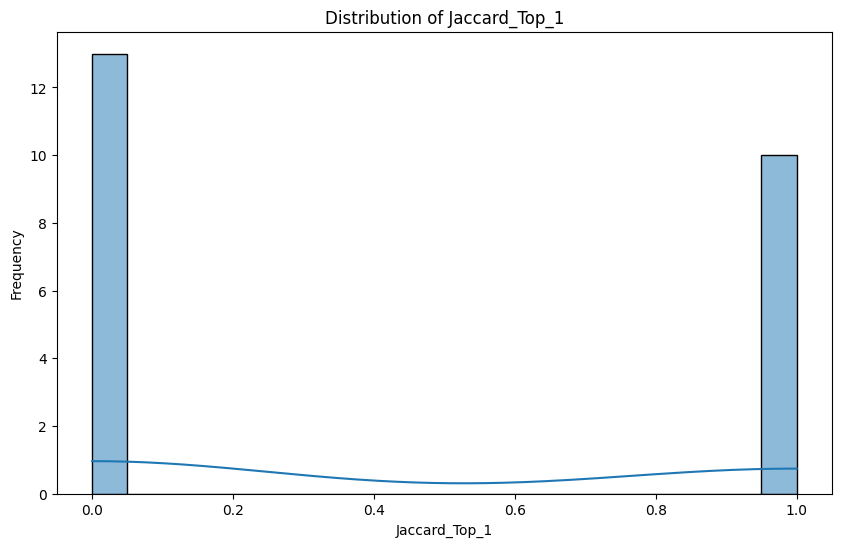

=== Statistical Summary for Jaccard_Top_1 ===
Mean: 0.43478260869565216
Standard Deviation: 0.49572844569527735
Median: 0.0
1st Quartile: 0.0
3rd Quartile: 1.0




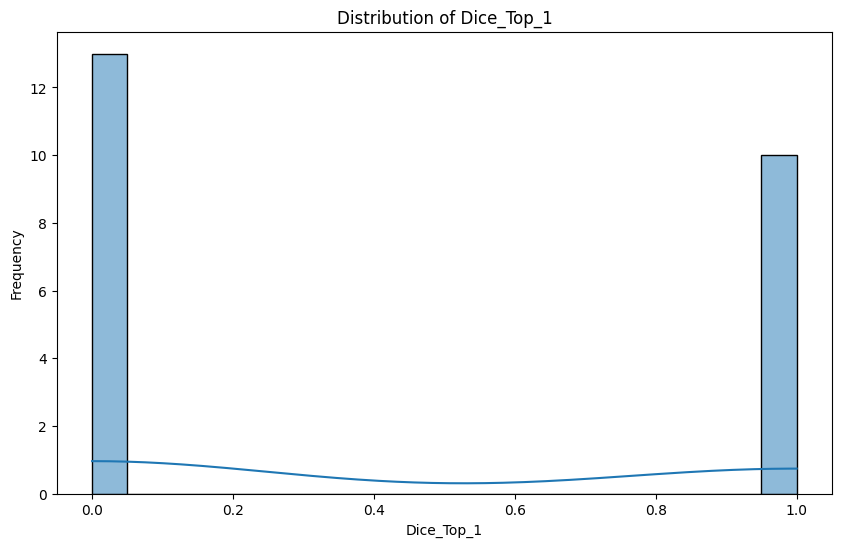

=== Statistical Summary for Dice_Top_1 ===
Mean: 0.43478260869565216
Standard Deviation: 0.49572844569527735
Median: 0.0
1st Quartile: 0.0
3rd Quartile: 1.0




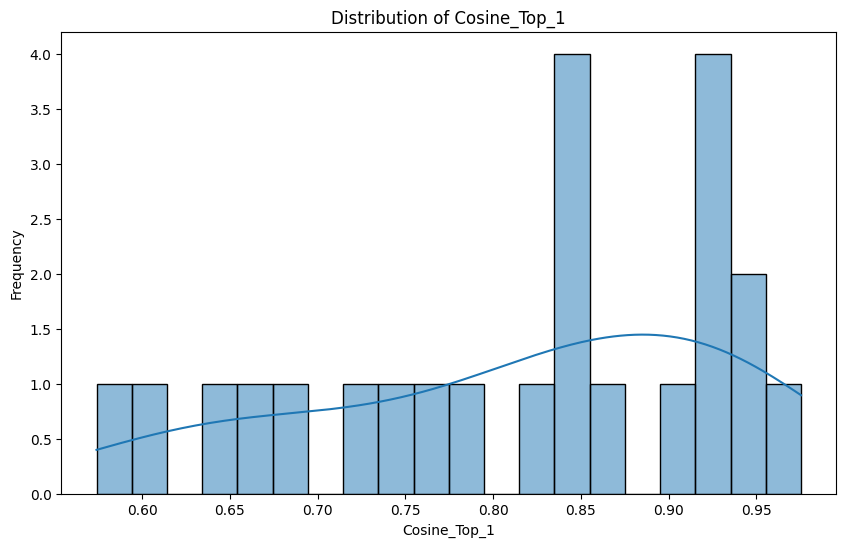

=== Statistical Summary for Cosine_Top_1 ===
Mean: 0.8152937918253567
Standard Deviation: 0.11632999893593428
Median: 0.8474679589271545
1st Quartile: 0.7361151427030563
3rd Quartile: 0.923115149140358




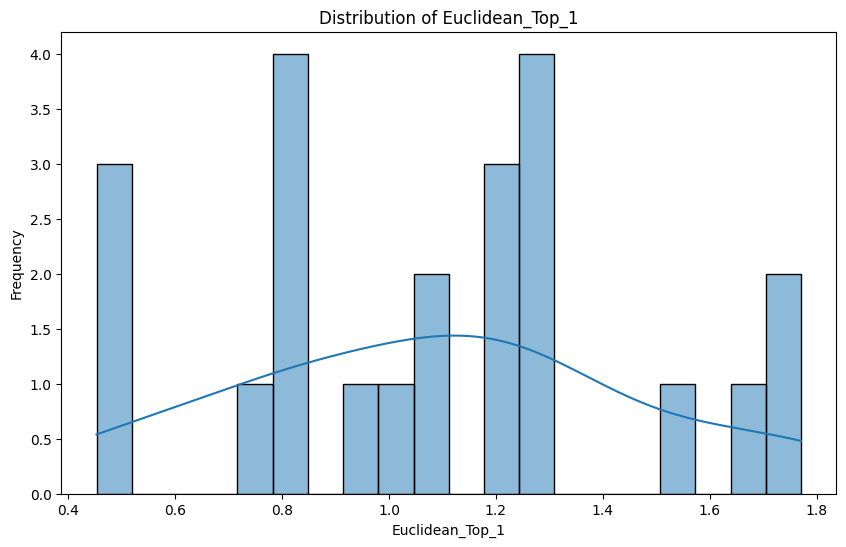

=== Statistical Summary for Euclidean_Top_1 ===
Mean: 1.0897728474636026
Standard Deviation: 0.3692365759186838
Median: 1.10597097715213
1st Quartile: 0.8102992403342788
3rd Quartile: 1.2613775917741532




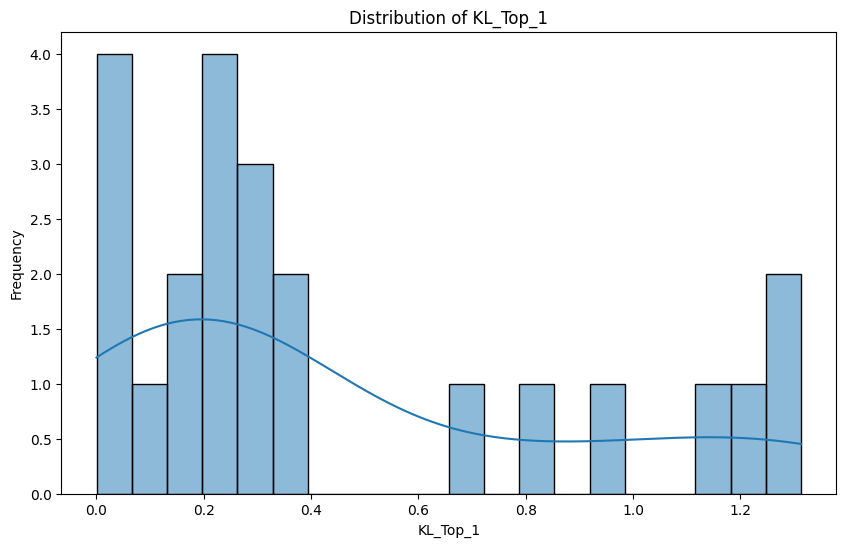

=== Statistical Summary for KL_Top_1 ===
Mean: 0.4479466483184938
Standard Deviation: 0.4349915334999183
Median: 0.2841026440861996
1st Quartile: 0.1840682782117113
3rd Quartile: 0.7396453642266814




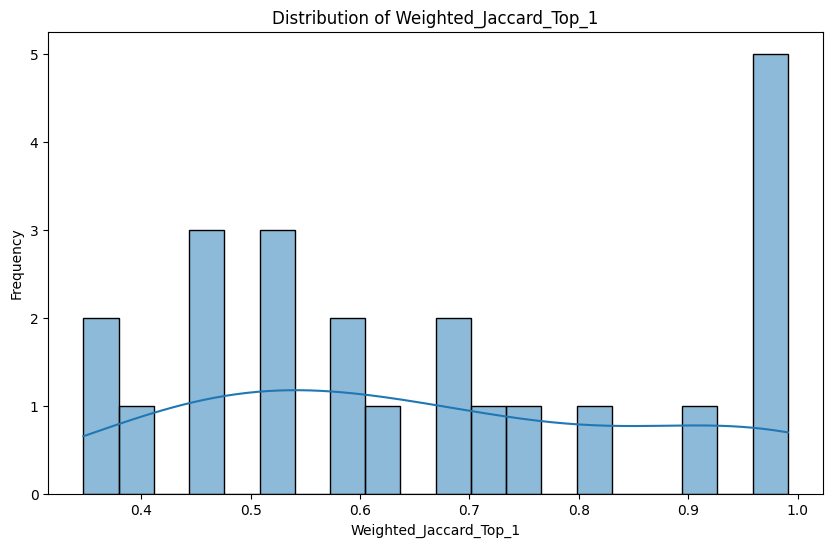

=== Statistical Summary for Weighted_Jaccard_Top_1 ===
Mean: 0.6664871304391652
Standard Deviation: 0.21123677892100154
Median: 0.6047667119239457
1st Quartile: 0.4946934576460075
3rd Quartile: 0.8581511756722422




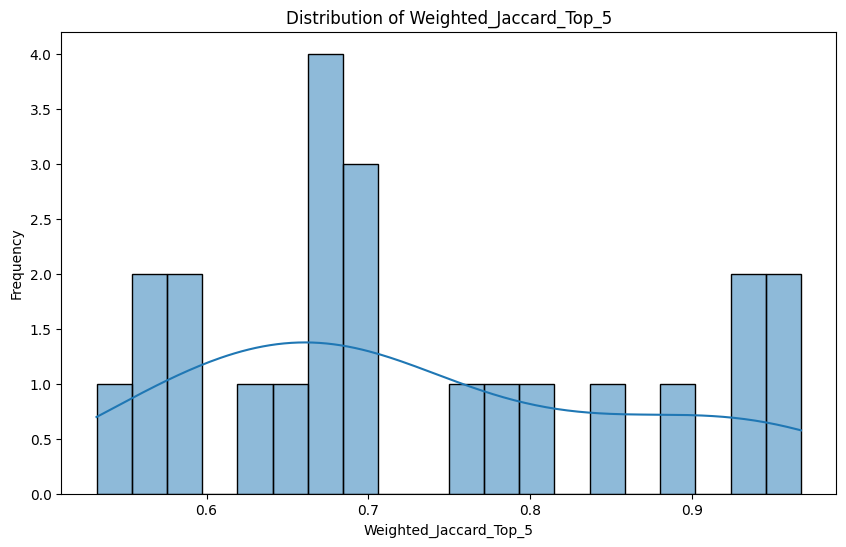

=== Statistical Summary for Weighted_Jaccard_Top_5 ===
Mean: 0.7304423084982394
Standard Deviation: 0.1333530243512937
Median: 0.6911952882581339
1st Quartile: 0.634700321638326
3rd Quartile: 0.8295833963122948




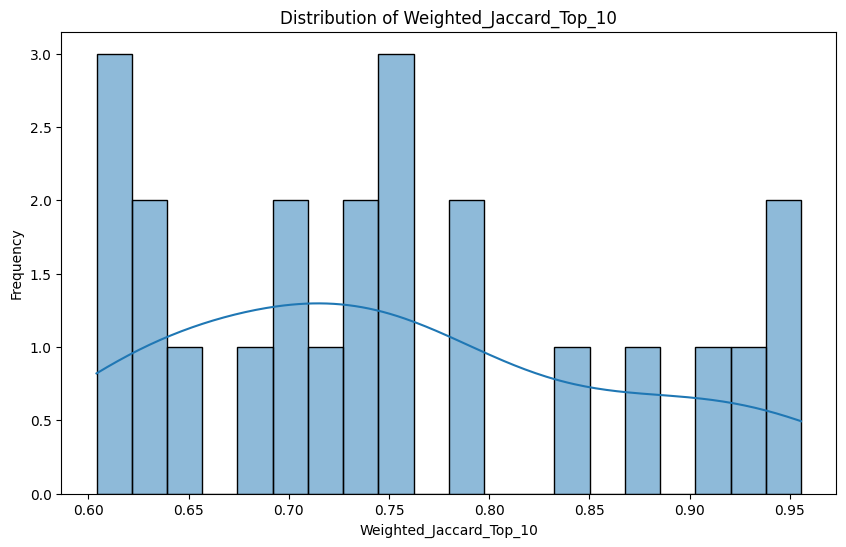

=== Statistical Summary for Weighted_Jaccard_Top_10 ===
Mean: 0.7528124480581776
Standard Deviation: 0.10835406634342089
Median: 0.7426393231740531
1st Quartile: 0.667504340453806
3rd Quartile: 0.8224181994268993




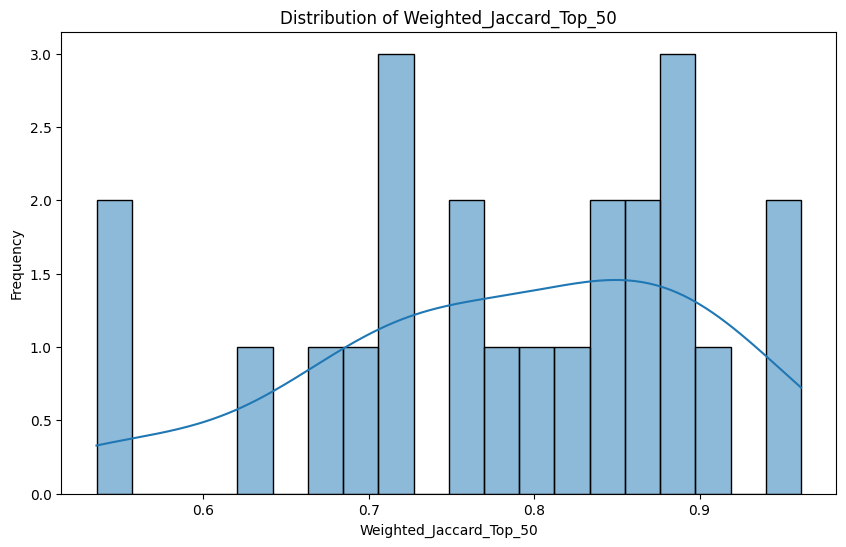

=== Statistical Summary for Weighted_Jaccard_Top_50 ===
Mean: 0.7849791717195226
Standard Deviation: 0.11433668007871811
Median: 0.7956574764187153
1st Quartile: 0.7188959399307067
3rd Quartile: 0.8780731863787967




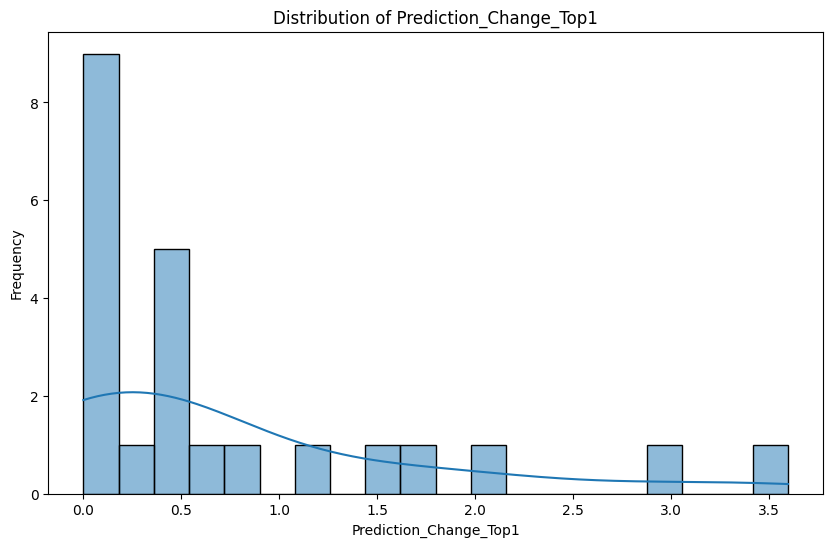

=== Statistical Summary for Prediction_Change_Top1 ===
Mean: 0.7457071154013925
Standard Deviation: 0.9745020467311739
Median: 0.4222029447555542
1st Quartile: 0.0
3rd Quartile: 0.9389490783214569




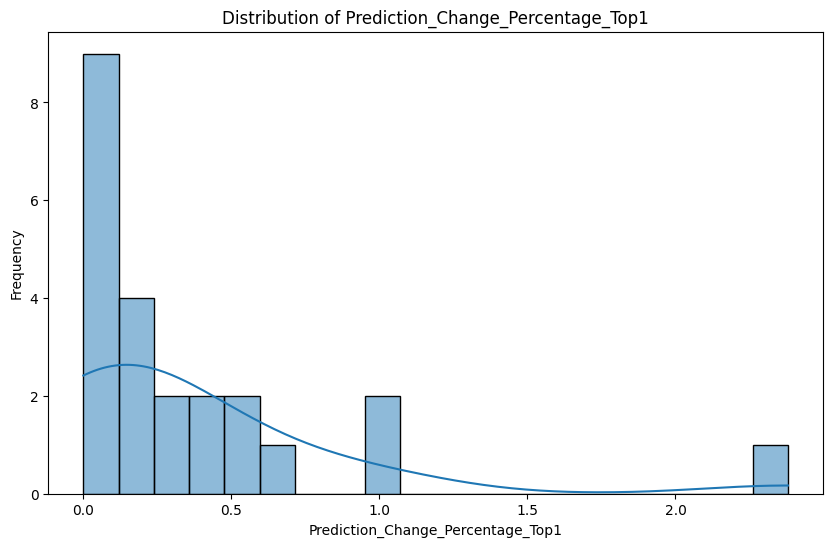

=== Statistical Summary for Prediction_Change_Percentage_Top1 ===
Mean: 0.3608681368439094
Standard Deviation: 0.5265427278973754
Median: 0.18386796116828918
1st Quartile: 0.0
3rd Quartile: 0.46081267297267914




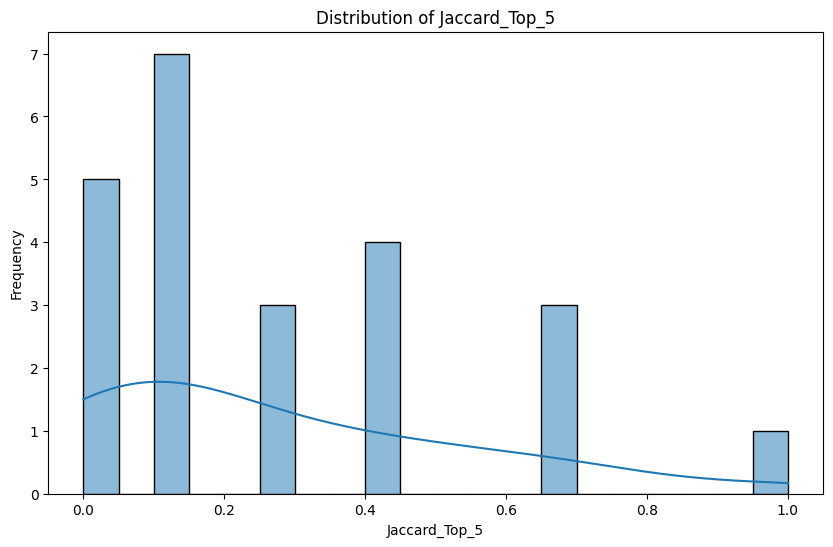

=== Statistical Summary for Jaccard_Top_5 ===
Mean: 0.27139406487232565
Standard Deviation: 0.267670139283127
Median: 0.1111111111111111
1st Quartile: 0.1111111111111111
3rd Quartile: 0.42857142857142855




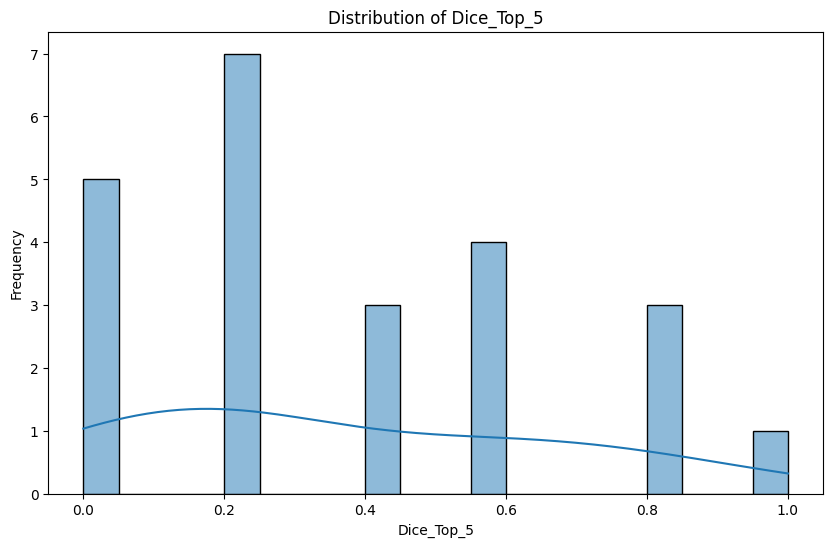

=== Statistical Summary for Dice_Top_5 ===
Mean: 0.3652173913043478
Standard Deviation: 0.29870546151856814
Median: 0.2
1st Quartile: 0.2
3rd Quartile: 0.6




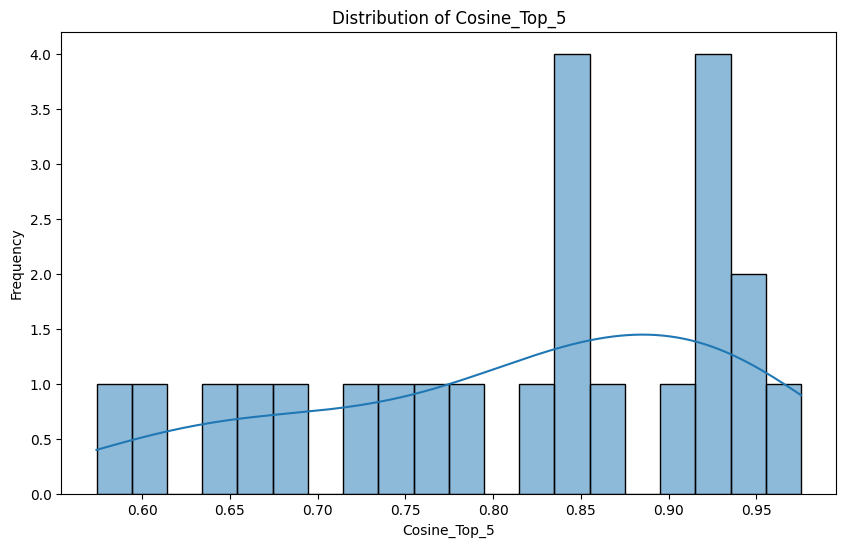

=== Statistical Summary for Cosine_Top_5 ===
Mean: 0.8152937918253567
Standard Deviation: 0.11632999893593428
Median: 0.8474679589271545
1st Quartile: 0.7361151427030563
3rd Quartile: 0.923115149140358




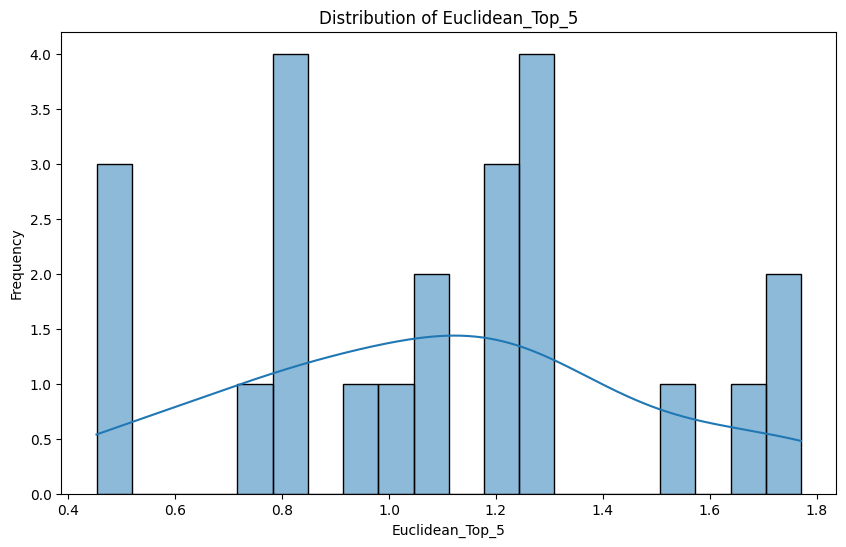

=== Statistical Summary for Euclidean_Top_5 ===
Mean: 1.0897728474636026
Standard Deviation: 0.3692365759186838
Median: 1.10597097715213
1st Quartile: 0.8102992403342788
3rd Quartile: 1.2613775917741532




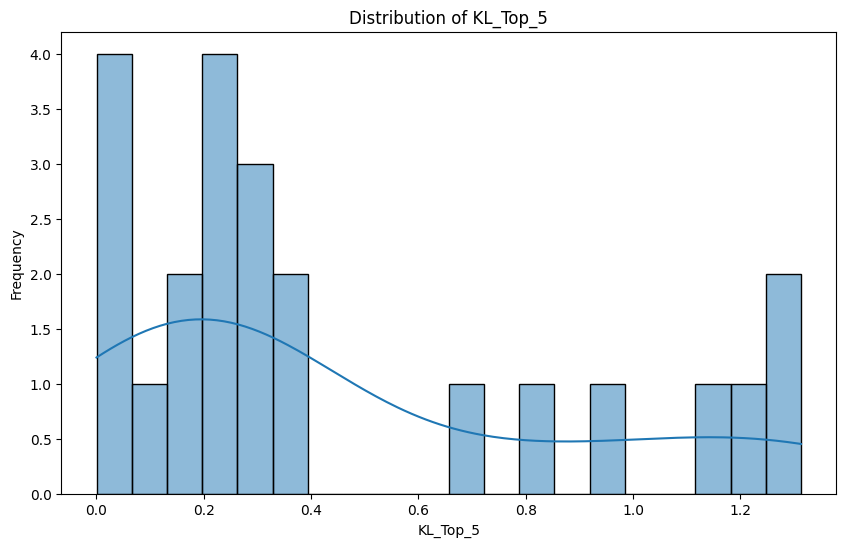

=== Statistical Summary for KL_Top_5 ===
Mean: 0.4479466483184938
Standard Deviation: 0.4349915334999183
Median: 0.2841026440861996
1st Quartile: 0.1840682782117113
3rd Quartile: 0.7396453642266814




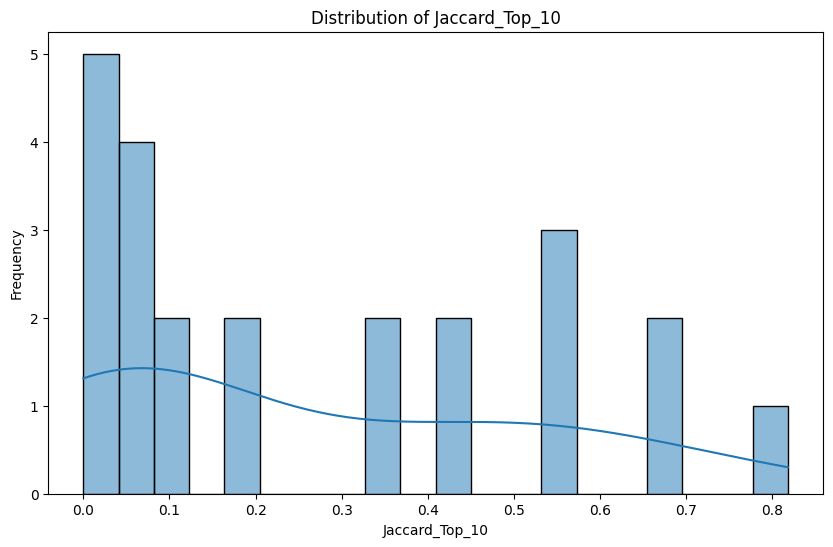

=== Statistical Summary for Jaccard_Top_10 ===
Mean: 0.2641912610952858
Standard Deviation: 0.25626293681500767
Median: 0.17647058823529413
1st Quartile: 0.05263157894736842
3rd Quartile: 0.48351648351648346




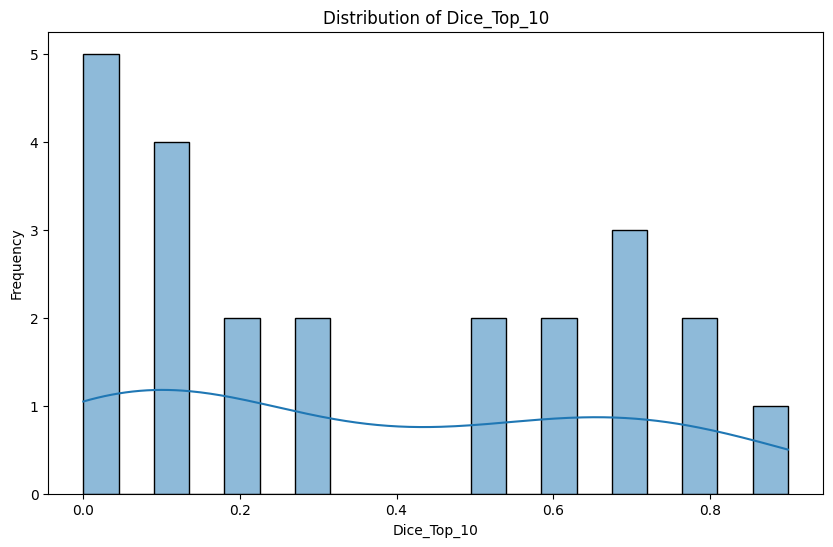

=== Statistical Summary for Dice_Top_10 ===
Mean: 0.3565217391304348
Standard Deviation: 0.306205510637548
Median: 0.3
1st Quartile: 0.1
3rd Quartile: 0.6499999999999999




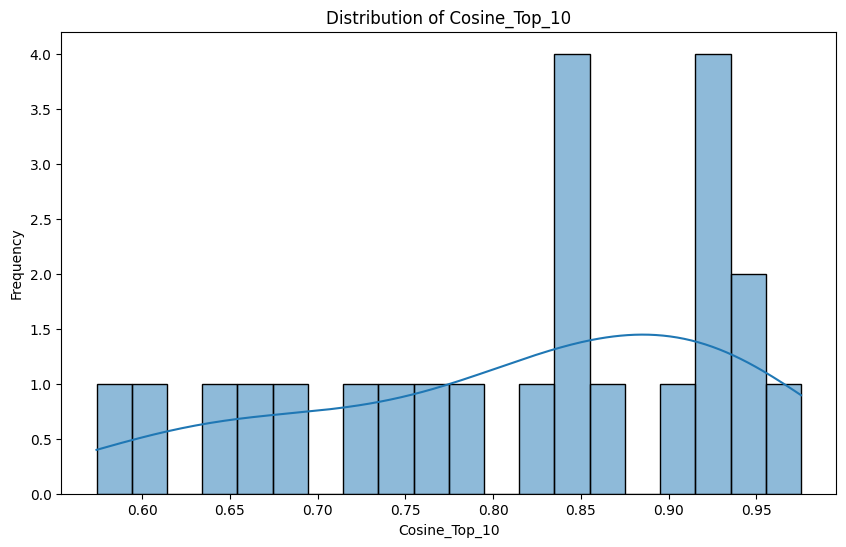

=== Statistical Summary for Cosine_Top_10 ===
Mean: 0.8152937918253567
Standard Deviation: 0.11632999893593428
Median: 0.8474679589271545
1st Quartile: 0.7361151427030563
3rd Quartile: 0.923115149140358




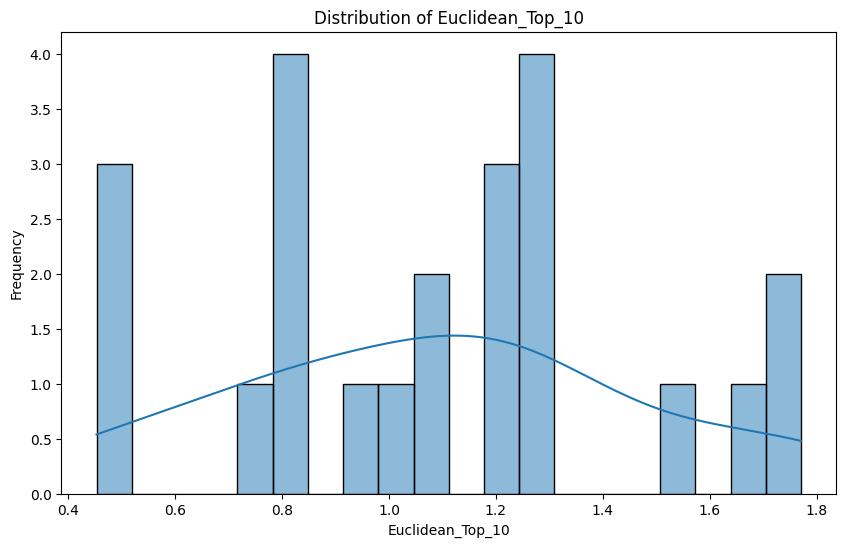

=== Statistical Summary for Euclidean_Top_10 ===
Mean: 1.0897728474636026
Standard Deviation: 0.3692365759186838
Median: 1.10597097715213
1st Quartile: 0.8102992403342788
3rd Quartile: 1.2613775917741532




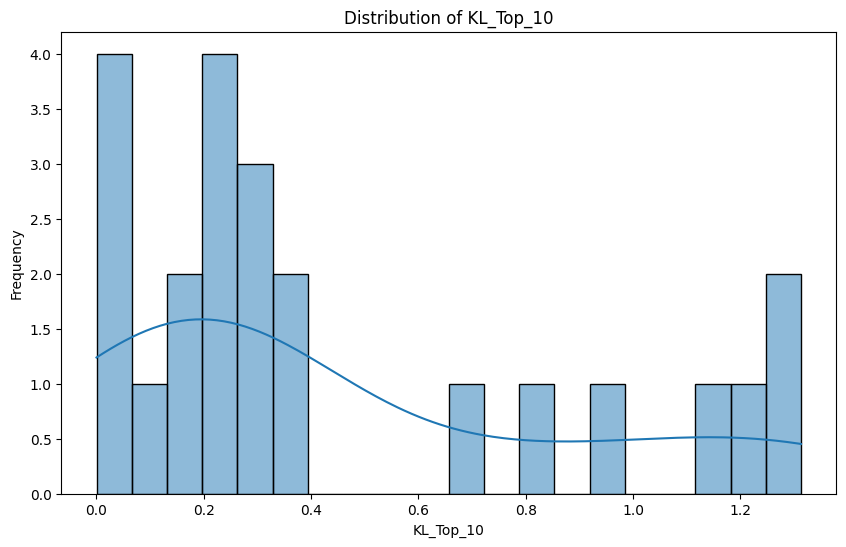

=== Statistical Summary for KL_Top_10 ===
Mean: 0.4479466483184938
Standard Deviation: 0.4349915334999183
Median: 0.2841026440861996
1st Quartile: 0.1840682782117113
3rd Quartile: 0.7396453642266814




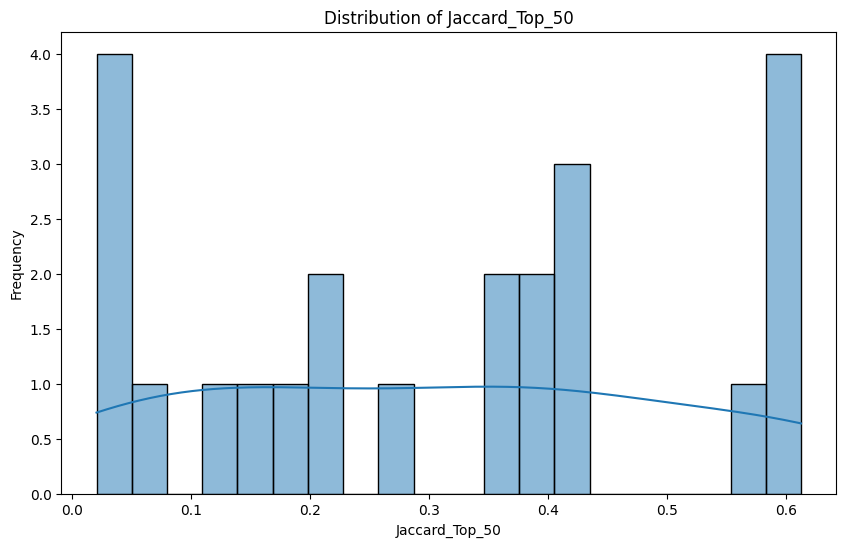

=== Statistical Summary for Jaccard_Top_50 ===
Mean: 0.3091483703122551
Standard Deviation: 0.2027062676730312
Median: 0.35135135135135137
1st Quartile: 0.14289446185997912
3rd Quartile: 0.42857142857142855




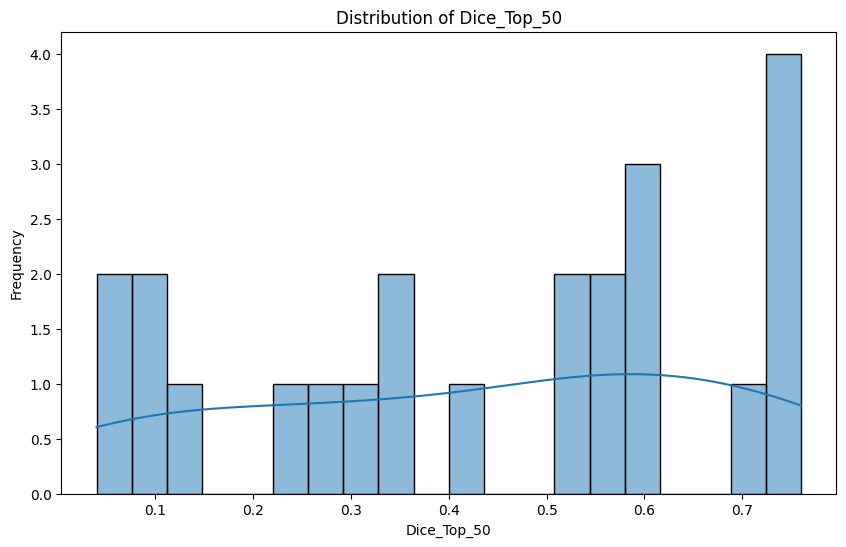

=== Statistical Summary for Dice_Top_50 ===
Mean: 0.43478260869565216
Standard Deviation: 0.24432461594856156
Median: 0.52
1st Quartile: 0.25
3rd Quartile: 0.6




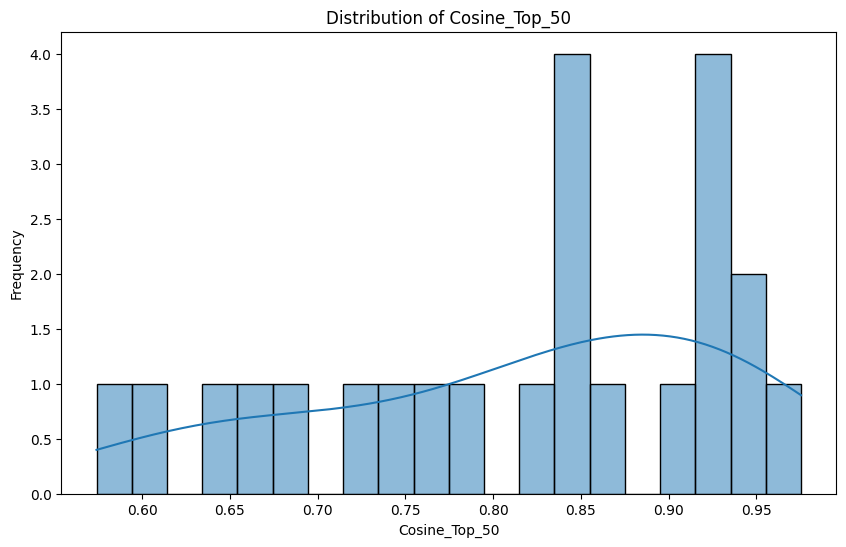

=== Statistical Summary for Cosine_Top_50 ===
Mean: 0.8152937918253567
Standard Deviation: 0.11632999893593428
Median: 0.8474679589271545
1st Quartile: 0.7361151427030563
3rd Quartile: 0.923115149140358




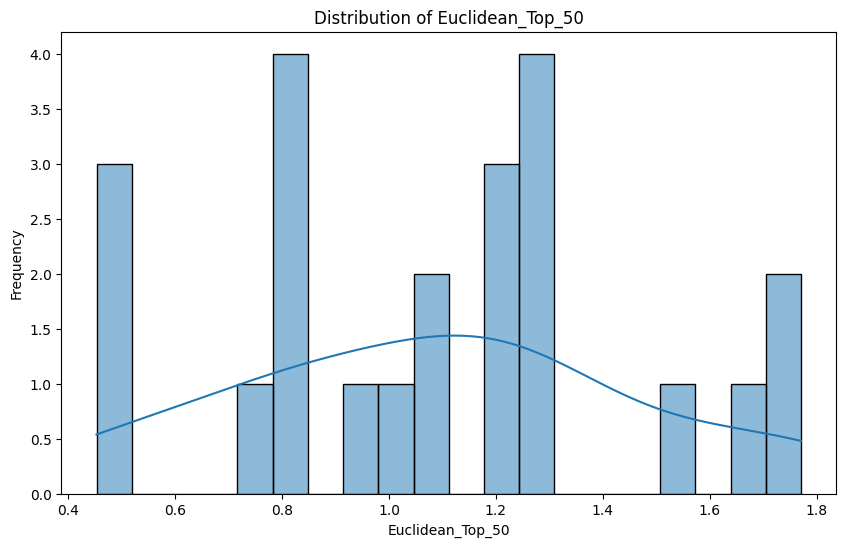

=== Statistical Summary for Euclidean_Top_50 ===
Mean: 1.0897728474636026
Standard Deviation: 0.3692365759186838
Median: 1.10597097715213
1st Quartile: 0.8102992403342788
3rd Quartile: 1.2613775917741532




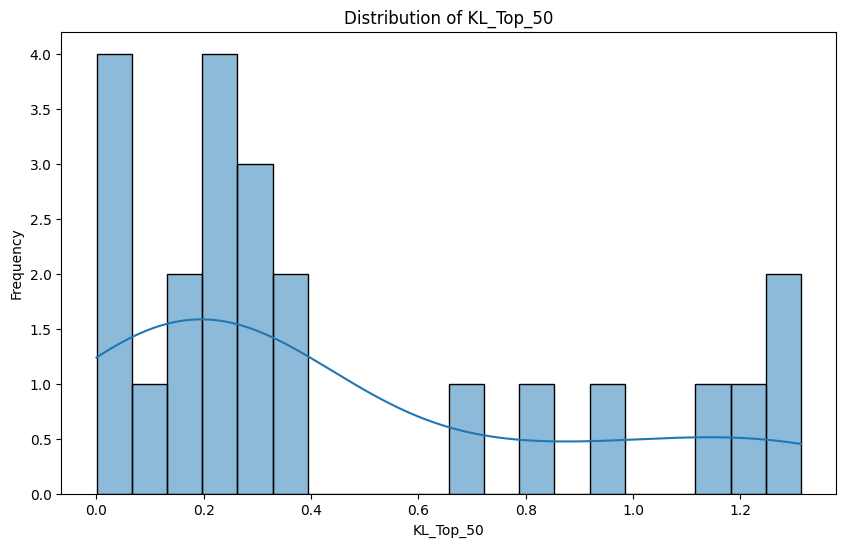

=== Statistical Summary for KL_Top_50 ===
Mean: 0.4479466483184938
Standard Deviation: 0.4349915334999183
Median: 0.2841026440861996
1st Quartile: 0.1840682782117113
3rd Quartile: 0.7396453642266814




In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 这是一个用于数据可视化的Python库

# 初始化一个用于存储所有度量数据的字典
all_metrics = {}

# 指定保存.npy文件的根目录
root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"

# 遍历根目录下的所有子目录
for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    # 检查是否为目录
    if os.path.isdir(subfolder_path):
        npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
        # 检查.npy文件是否存在
        if os.path.exists(npy_file_path):
            # 加载.npy文件
            metrics = np.load(npy_file_path, allow_pickle=True).item()
            
            # 将这些度量值添加到all_metrics字典中
            for key, value in metrics.items():
                if key not in all_metrics:
                    all_metrics[key] = []
                all_metrics[key].append(value)

# 绘制直方图和进行统计分析
for metric, values in all_metrics.items():
    if 'Prediction_Change_Top_1' not in metric and 'Prediction_Change_Percentage_Top_1' not in metric:
        plt.figure(figsize=(10, 6))
        
        # 使用Seaborn库绘制带有KDE的直方图
        sns.histplot(values, bins=20, kde=True)
        
        plt.title(f'Distribution of {metric}')
        plt.xlabel(metric)
        plt.ylabel('Frequency')
        
        # 显示图像
        plt.show()
        
        # 统计分析
        mean_value = np.mean(values)
        std_dev = np.std(values)
        median_value = np.median(values)
        quartiles = np.percentile(values, [25, 75])
        
        print(f"=== Statistical Summary for {metric} ===")
        print(f"Mean: {mean_value}")
        print(f"Standard Deviation: {std_dev}")
        print(f"Median: {median_value}")
        print(f"1st Quartile: {quartiles[0]}")
        print(f"3rd Quartile: {quartiles[1]}")
        print("\n")




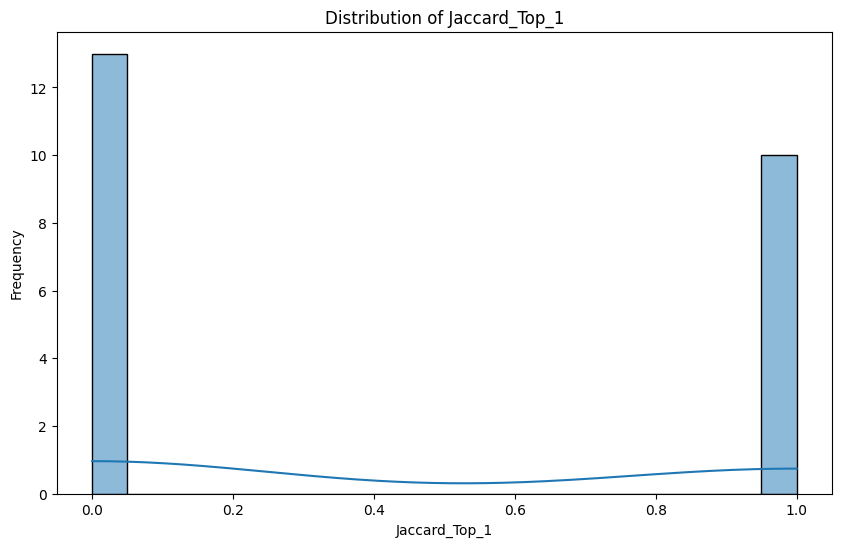

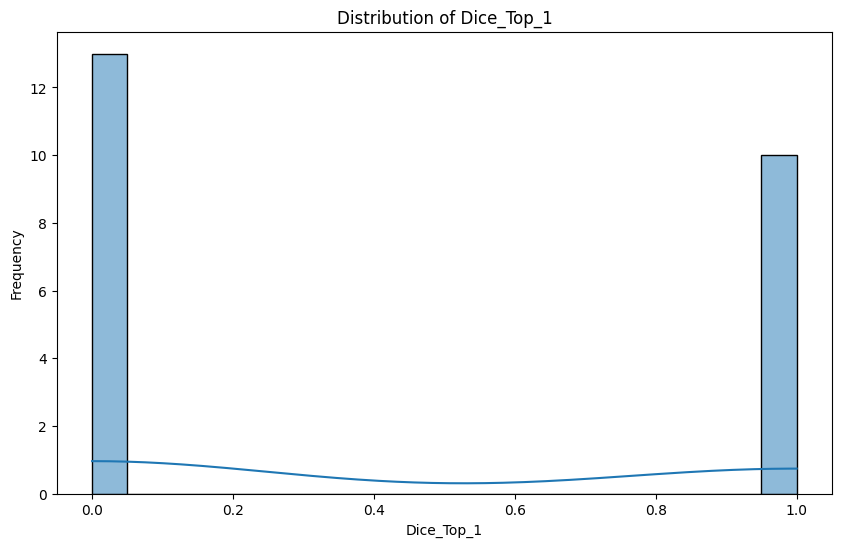

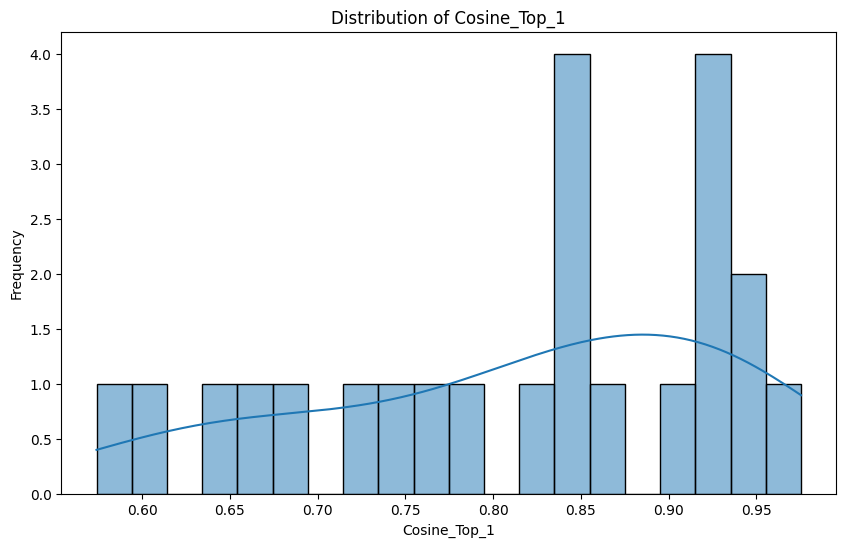

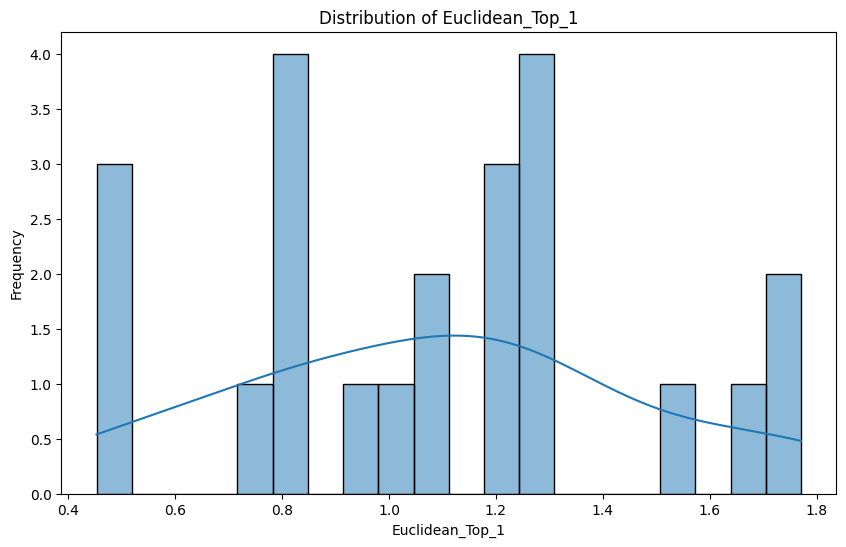

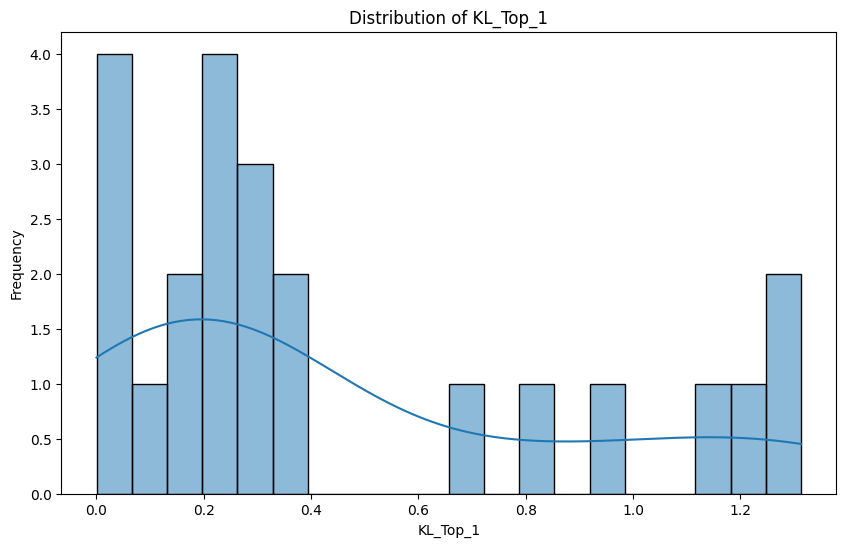

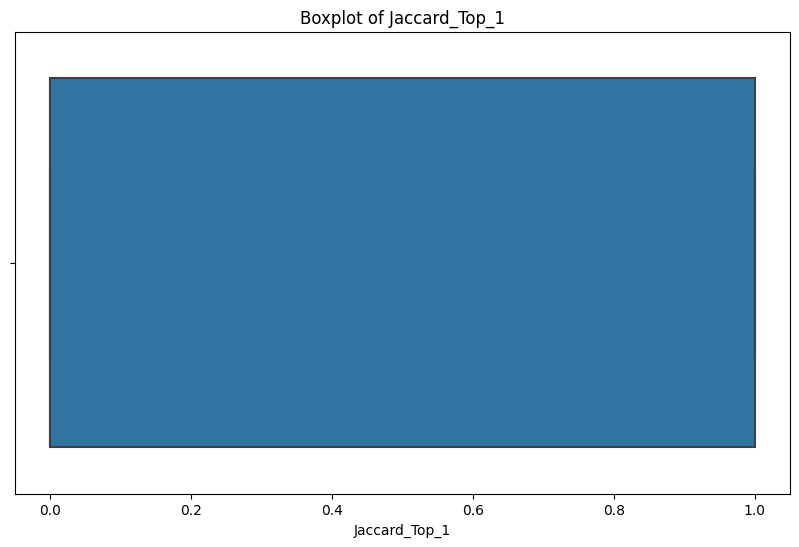

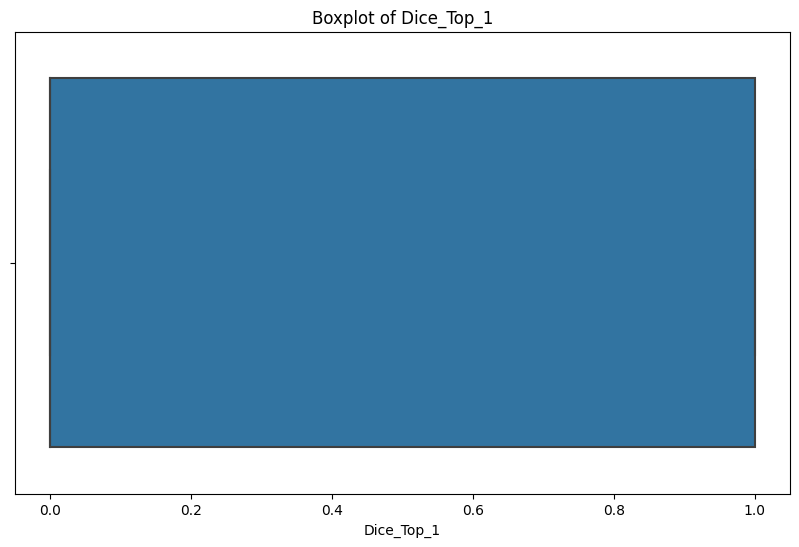

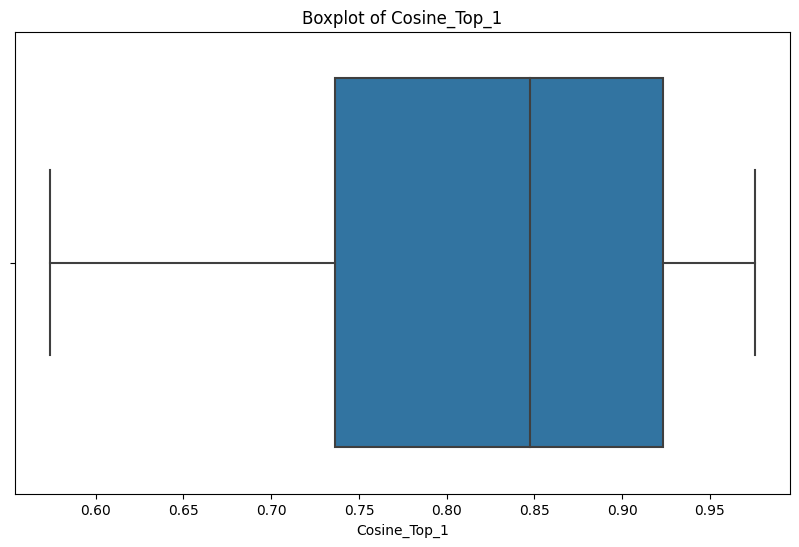

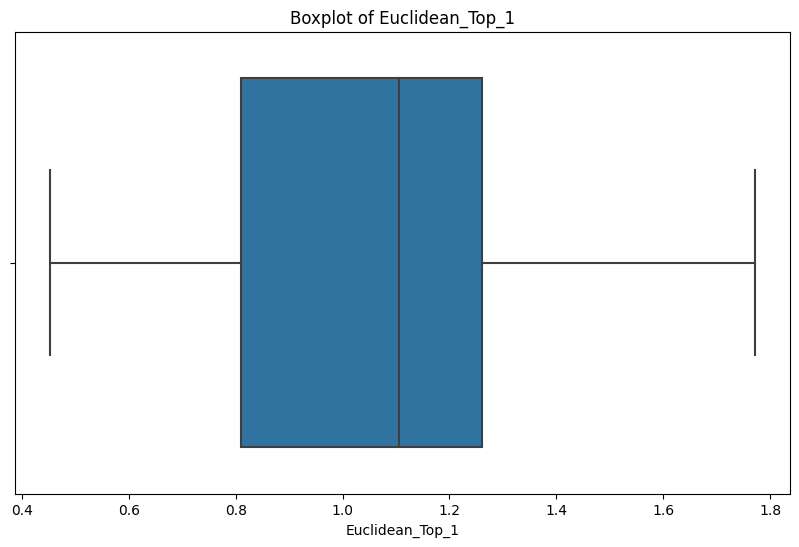

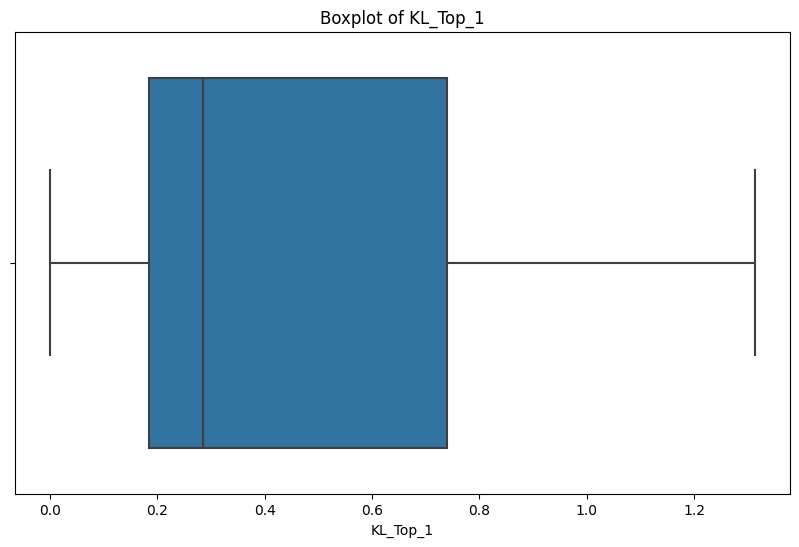

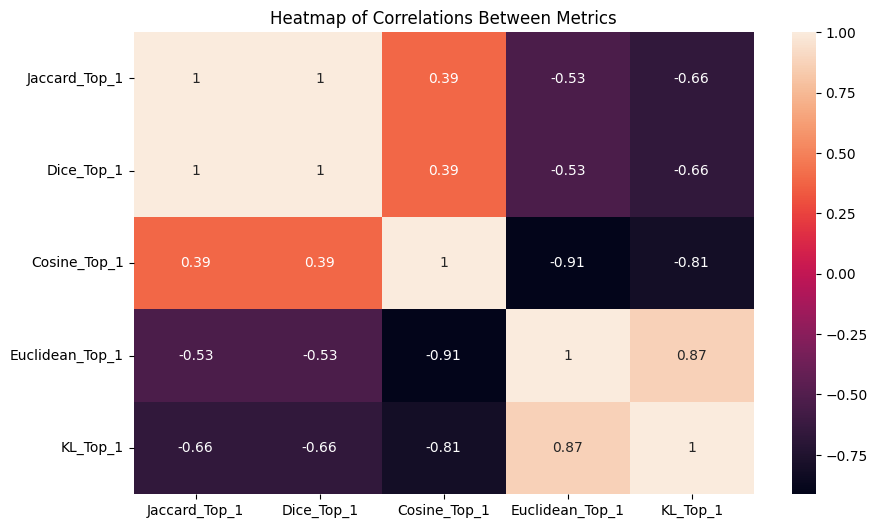

Jaccard_Top_1: Mean = 0.43478260869565216, Std Dev = 0.5068698018697019, Median = 0.0, Q1 = 0.0, Q3 = 1.0
Dice_Top_1: Mean = 0.43478260869565216, Std Dev = 0.5068698018697019, Median = 0.0, Q1 = 0.0, Q3 = 1.0
Cosine_Top_1: Mean = 0.8152937918253567, Std Dev = 0.11894448265816224, Median = 0.8474679589271545, Q1 = 0.7361151427030563, Q3 = 0.923115149140358
Euclidean_Top_1: Mean = 1.0897728474636026, Std Dev = 0.3775350632067498, Median = 1.10597097715213, Q1 = 0.8102992403342788, Q3 = 1.2613775917741532
KL_Top_1: Mean = 0.4479466483184938, Std Dev = 0.4447678448043552, Median = 0.2841026440861996, Q1 = 0.1840682782117113, Q3 = 0.7396453642266814


In [32]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

# Helper function to read all similarity metrics saved as .npy files into a list of dictionaries
def read_saved_metrics(root_folder):
    all_similarities = []
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        if os.path.isdir(subfolder_path):
            similarity_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
            if os.path.exists(similarity_file_path):
                similarities = np.load(similarity_file_path, allow_pickle=True).item()
                all_similarities.append(similarities)
    return all_similarities

# Root folder where all the similarity metrics are saved
root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"  # Replace with your directory

# Read the saved metrics
all_similarities = read_saved_metrics(root_folder)

# Convert the list of dictionaries to a DataFrame for easier manipulation
df = pd.DataFrame(all_similarities)

# Visualization and Analysis
metrics_to_analyze = ["Jaccard_Top_1", "Dice_Top_1", "Cosine_Top_1", "Euclidean_Top_1", "KL_Top_1"]

# Histograms
for metric in metrics_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[metric], bins=20, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots/Violin plots
for metric in metrics_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[metric])
    plt.title(f'Boxplot of {metric}')
    plt.xlabel(metric)
    plt.show()

# Heatmap for correlation
correlation_matrix = df[metrics_to_analyze].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlations Between Metrics')
plt.show()

# Statistical Analysis
for metric in metrics_to_analyze:
    mean = df[metric].mean()
    std_dev = df[metric].std()
    median = df[metric].median()
    q1 = df[metric].quantile(0.25)
    q3 = df[metric].quantile(0.75)
    
    print(f"{metric}: Mean = {mean}, Std Dev = {std_dev}, Median = {median}, Q1 = {q1}, Q3 = {q3}")

# For further analysis like clustering or anomaly detection, you can proceed with df DataFrame
# df now contains all your similarity metrics and can be used for advanced statistical methods.


In [16]:
# Importing the necessary libraries to read and display .npy file contents
import numpy as np

def display_npy_file_content(npy_file_path):
    """
    Display the content of a .npy file.
    """
    if not os.path.exists(npy_file_path):
        return f"File {npy_file_path} doesn't exist."
    npy_content = np.load(npy_file_path, allow_pickle=True).item()
    return npy_content

# Sample usage
# Assuming the file path is "/path/to/your/file.npy"
file_path = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked/ILSVRC2012_val_00000171/original_scores.npy"

# Display the content
content = display_npy_file_content(file_path)
content


"File /home/workstation/code/XAImethods/hf_cam_dev/results/masked/ILSVRC2012_val_00000171/original_scores.npy doesn't exist."